In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../Reports/50_Startups.csv")

In [2]:
x = df.drop(columns=["Profit"])
y = df["Profit"]

In [3]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [4]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=20, random_state=0)

In [5]:
rf.fit(x_train, y_train)

RandomForestRegressor(n_estimators=20, random_state=0)

In [6]:
y_pred_test = rf.predict(x_test)
y_pred_train = rf.predict(x_train)

In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mse_test = mean_squared_error(y_test, y_pred_test)
mse_train = mean_squared_error(y_train, y_pred_train)
print(
    " Mean Squared error for testing data: ",
    mse_test,
)
print(
    " Mean Squared error for training data: ",
    mse_train,
)

 Mean Squared error for testing data:  70095552.70758636
 Mean Squared error for training data:  29326587.045551307


In [8]:
print("mean absolute error for test data: ", mean_absolute_error(y_test, y_pred_test))
print(
    "mean absolute error for training data",
    mean_absolute_error(y_train, y_pred_train),
)

mean absolute error for test data:  6673.147700000005
mean absolute error for training data 3915.6474571428585


In [9]:
rmse_train = np.sqrt(mse_train)
print("Root Mean Squared Error of train data: ", rmse_train)
rmse_test = np.sqrt(mse_test)
print("Root Mean Squared Error of test data: ", rmse_test)

Root Mean Squared Error of train data:  5415.402759310826
Root Mean Squared Error of test data:  8372.308684442205


In [10]:
r2_score_test = r2_score(y_test, y_pred_test)
print("R2 Score of test data: ", r2_score_test)
r2_score_train = r2_score(y_train, y_pred_train)
print("R2 Score of train data: ", r2_score_train)

R2 Score of test data:  0.9273807295243575
R2 Score of train data:  0.9841486277469585


In [11]:
adj_r2_test = 1 - (
    (1 - r2_score(y_test, y_pred_test))
    * (len(x_test) - 1)
    / (len(x_test) - x_test.shape[1] - 1)
)
print("Adjusted R2 Score of test data: ", adj_r2_test)
adj_r2_train = 1 - (
    (1 - r2_score(y_train, y_pred_train))
    * (len(x_train) - 1)
    / (len(x_train) - x_train.shape[1] - 1)
)
print("Adjusted R2 Score of train data: ", adj_r2_train)

Adjusted R2 Score of test data:  0.9075754739400913
Adjusted R2 Score of train data:  0.9826146239805352


In [12]:
feature_importances = rf.feature_importances_
features = x.columns
importance_df = pd.DataFrame({"Feature": features, "Importance": feature_importances})
importance_df = importance_df.sort_values(by="Importance", ascending=False)

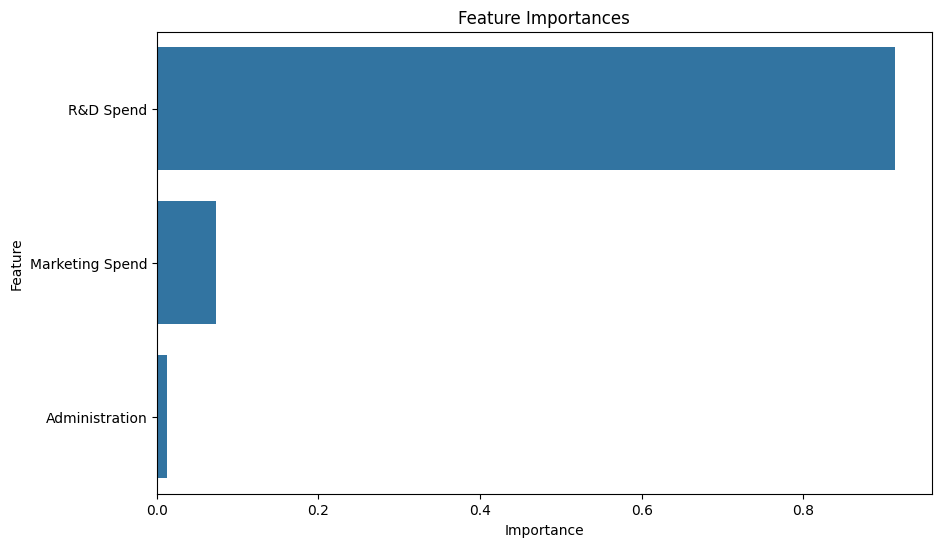

In [13]:
plt.figure(figsize=(10, 6))
sns.barplot(x="Importance", y="Feature", data=importance_df)
plt.title("Feature Importances")
plt.show()

In [14]:
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

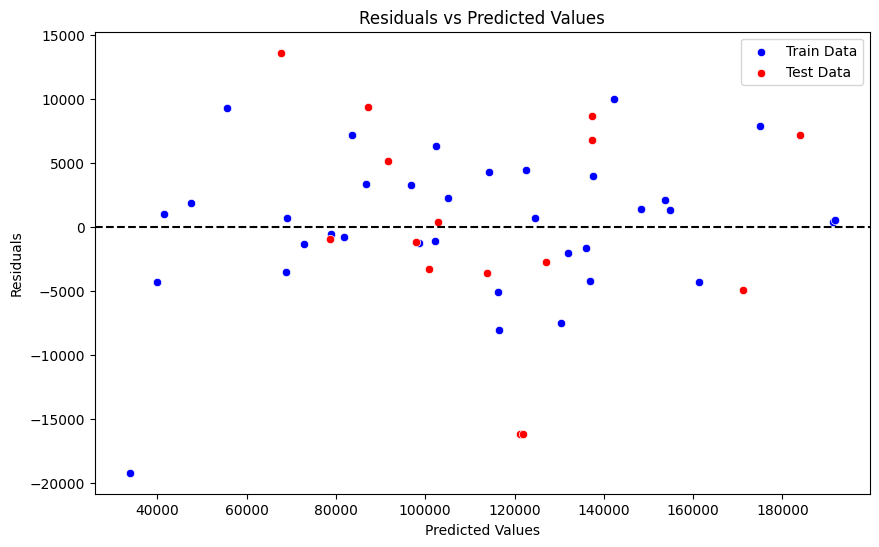

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred_train, y=residuals_train, color="blue", label="Train Data")
sns.scatterplot(x=y_pred_test, y=residuals_test, color="red", label="Test Data")
plt.axhline(y=0, color="black", linestyle="--")
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.legend()
plt.show()

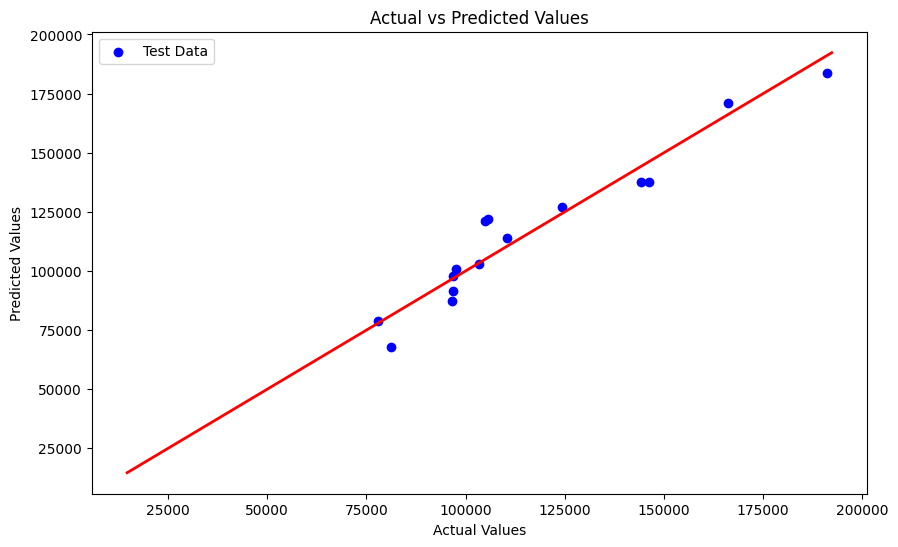

In [16]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, color="blue", label="Test Data")
plt.plot([y.min(), y.max()], [y.min(), y.max()], color="red", lw=2)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values")
plt.legend()
plt.show()